## <b>Task: Use Linear Regression for Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('pregnency.csv')
data.head()

,Implied_Gender,Account_holder_address,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


<h3>Task: To Predict Pregnant or not</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Implied_Gender          1000 non-null   object
 1   Account_holder_address  1000 non-null   object
 2   Pregnancy_Test          1000 non-null   int64 
 3   Birth_Control           1000 non-null   int64 
 4   Feminine_Hygiene        1000 non-null   int64 
 5   Folic_Acid              1000 non-null   int64 
 6   Prenatal_Vitamins       1000 non-null   int64 
 7   Prenatal_Yoga           1000 non-null   int64 
 8   Body_Pillow             1000 non-null   int64 
 9   Ginger_Ale              1000 non-null   int64 
 10  Sea_Bands               1000 non-null   int64 
 11  Stopped_buying_ciggies  1000 non-null   int64 
 12  Cigarettes              1000 non-null   int64 
 13  Smoking_Cessation       1000 non-null   int64 
 14  Stopped_buying_wine     1000 non-null   int64 
 15  Wine 

In [4]:
data.describe()

,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,PREGNANT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.075000,0.140000,0.141000,0.106000,0.128000,0.018000,0.018000,0.069000,0.030000,0.092000,0.097000,0.060000,0.130000,0.123000,0.131000,0.50000
std,0.263523,0.347161,0.348196,0.307992,0.334257,0.133018,0.133018,0.253581,0.170673,0.289171,0.296106,0.237606,0.336472,0.328602,0.337569,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Splitting dataset into dependent variable and independent variable

In [5]:
x = data.drop(["PREGNANT"],axis=1)
y = data.PREGNANT

Encoding Categorical Features

In [6]:
col2enc=x.select_dtypes(include=[object])
encoded_features = pd.get_dummies(col2enc)
encoded_features.drop(["Implied_Gender_U","Account_holder_address_P"],axis=1,inplace = True)
encoded_features

,Implied_Gender_F,Implied_Gender_M,Account_holder_address_A,Account_holder_address_H
0,0,1,1,0
1,0,1,0,1
2,0,1,0,1
3,0,0,0,1
4,1,0,1,0
...,...,...,...,...
995,0,1,1,0
996,1,0,1,0
997,0,1,0,1
998,0,0,0,1


Getting Non-Categorical Features

In [7]:
numdata=x.select_dtypes(exclude=[object])
numdata

,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merging Categorical and Non-Categorical Features

In [8]:
df = pd.concat([encoded_features,numdata,],axis = 'columns')
df

,Implied_Gender_F,Implied_Gender_M,Account_holder_address_A,Account_holder_address_H,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes
0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Buidling Model 

### Linear Regression using Statsmodel Library
For more info, visit: https://www.statsmodels.org/stable/examples/index.html#linear-regression-models

OLS result interpretation: https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

In [9]:
import statsmodels.api as sm
X_constant = sm.add_constant(df)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PREGNANT   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     43.57
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          4.46e-116
Time:                        13:27:42   Log-Likelihood:                -419.64
No. Observations:                1000   AIC:                             879.3
Df Residuals:                     980   BIC:                             977.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4842      0.055      8.752      0.000       0.376       0.593
Implied_Gender_F            -0.0268      0.040     -0.665      0.506      -0.106       0.052
Implied_Gender_M            -0.0983      0.041     -2.390      0.017      -0.179      -0.018
Account_holder_address_A    -0.0133      0.043     -0.307      0.759      -0.098       0.072
Account_holder_address_H    -0.0279      0.043     -0.652      0.515      -0.112       0.056
Pregnancy_Test               0.2164      0.046      4.654      0.000       0.125       0.308
Birth_Control               -0.2741      0.035     -7.874      0.000      -0.342      -0.206
Feminine_Hygiene            -0.2381      0.034     -6.939      0.000      -0.305      -0.171
Folic_Acid                   0.3456      0.039      8.827      0.000       0.269       0.422
Prenatal_Vitamins            0.2941      0.036      8.160      0.000       0.223       0.365
Prenatal_Yoga                0.3253      0.089      3.645      0.000       0.150       0.501
Body_Pillow                  0.1936      0.089      2.166      0.031       0.018       0.369
Ginger_Ale                   0.2299      0.047      4.882      0.000       0.138       0.322
Sea_Bands                    0.1458      0.070      2.088      0.037       0.009       0.283
Stopped_buying_ciggies       0.1605      0.042      3.850      0.000       0.079       0.242
Cigarettes                  -0.1591      0.040     -3.942      0.000      -0.238      -0.080
Smoking_Cessation            0.1647      0.052      3.192      0.001       0.063       0.266
Stopped_buying_wine          0.1878      0.036      5.231      0.000       0.117       0.258
Wine                        -0.2075      0.037     -5.662      0.000      -0.279      -0.136
Maternity_Clothes            0.2399      0.036      6.716      0.000       0.170       0.310
==============================================================================
Omnibus:                      100.106   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.927
Skew:                           0.172   Prob(JB):                     4.29e-08
Kurtosis:                       2.166   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X_constant['Predicted'] = lin_reg.predict(X_constant)

In [11]:
X_constant

,const,Implied_Gender_F,Implied_Gender_M,Account_holder_address_A,Account_holder_address_H,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,...,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Predicted
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.883132
1,1.0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.868499
2,1.0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.720147
3,1.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.686216
4,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.957235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.372613
996,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444103
997,1.0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.119913
998,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.456291


Maximum training accuracy of 83.600 achieved at the threshold of 0.4650


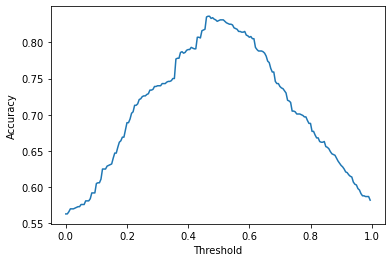

In [12]:
cols = ['Threshold', 'Accuracy']
lst = []
for i in np.arange(0,1,.005):
    X_constant['Class'] = X_constant['Predicted'].apply(lambda x: 1 if x>=i  else 0)
    acc = accuracy_score(y, X_constant['Class'].values)
    lst.append([i,acc])    
df1 = pd.DataFrame(lst, columns=cols)
threshold = df1.loc[df1['Accuracy'] == max(df1.Accuracy),'Threshold'].iloc[0]
X_constant['Class'] = X_constant['Predicted'].apply(lambda x: 1 if x>=threshold  else 0)
print("Maximum training accuracy of %3.3f achieved at the threshold of %0.4f" % (max(df1.Accuracy)*100, threshold))
plt.plot('Threshold', 'Accuracy', data = df1)
plt.ylabel('Accuracy')
plt.xlabel('Threshold')
plt.show()

In [13]:
X_constant['PREGNANT'] = data.PREGNANT
X_constant

,const,Implied_Gender_F,Implied_Gender_M,Account_holder_address_A,Account_holder_address_H,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,...,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Predicted,Class,PREGNANT
0,1.0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0.883132,1,1
1,1.0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0.868499,1,1
2,1.0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.720147,1,1
3,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.686216,1,1
4,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.957235,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.372613,0,0
996,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.444103,0,0
997,1.0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0.119913,0,0
998,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.456291,0,0


## <b> Loading Test data

In [14]:
data_test = pd.read_csv('pregnency_Test.csv')
y_test = data_test.PREGNANT
data_test.drop(["PREGNANT"],axis=1,inplace = True)
X_test_constant = sm.add_constant(data_test)
X_test_constant['Predicted'] = lin_reg.predict(X_test_constant)
X_test_constant['Class'] = X_test_constant['Predicted'].apply(lambda x: 1 if x>=threshold  else 0)
print("Test accuracy of %3.3f achieved through linear regression" % accuracy_score(y_test, X_test_constant['Class'].values))

Test accuracy of 0.811 achieved through linear regression


In [15]:
X_test_constant['PREGNANT'] = y_test.values
X_test_constant.drop(["const"],axis=1,inplace = True)
X_test_constant.to_csv('pregnancytestRegression.csv',index = False)
X_test_constant

,Implied_Gender_M,Implied_Gender_F,Account_holder_address_A,Account_holder_address_H,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,...,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Predicted,Class,PREGNANT
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0.582388,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.470924,1,1
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.604636,1,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.631885,1,1
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429470,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.723594,1,0
996,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0.034295,0,0
997,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.290976,0,0
998,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.032329,0,0


## Classification using Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model = LR.fit(df,y)
y_pred = model.predict(data_test)
y_prob = model.predict_proba(data_test)[:,1]
print("Test accuracy of %3.3f achieved through logistic regression" % accuracy_score(y_test, y_pred))

Test accuracy of 0.879 achieved through logistic regression


In [17]:
data_test['Probability of Preg'] = y_prob  
data_test['Class'] = y_pred
data_test['PREGNANT'] = y_test.values 
data_test.to_csv('pregnancytestLR.csv',index=False)
data_test

,Implied_Gender_M,Implied_Gender_F,Account_holder_address_A,Account_holder_address_H,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,...,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Probability of Preg,Class,PREGNANT
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0.588581,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.451695,0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.698860,1,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.721104,1,1
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.397683,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.844764,1,0
996,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0.039223,0,0
997,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.175614,0,0
998,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.035777,0,0


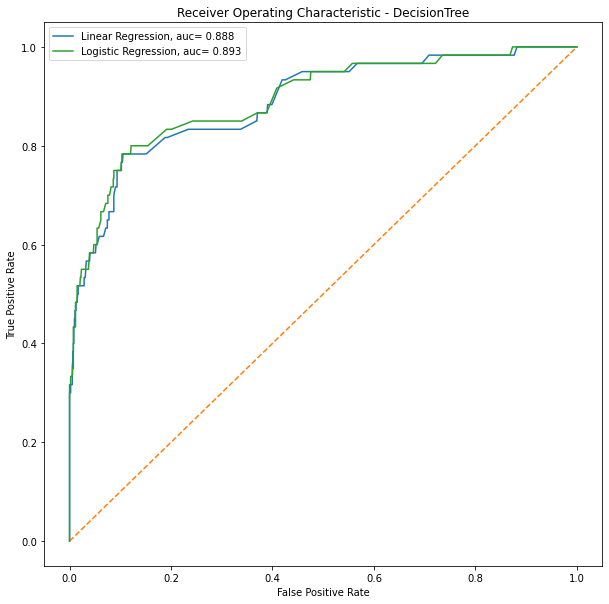

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,10))
fpr, tpr, thresh = roc_curve(y_test, X_test_constant['Predicted'].values)
auc = metrics.roc_auc_score(y_test, X_test_constant['Predicted'].values)
plt.plot(figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr,label="Linear Regression, auc= %2.3f" %(auc))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fpr, tpr, thresh = roc_curve(y_test, y_prob)
auc = metrics.roc_auc_score(y_test, y_prob)
plt.plot(figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr,label="Logistic Regression, auc= %2.3f" %(auc))
plt.legend(loc=0)
plt.show()